In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
utility = pd.read_csv('um.txt', sep='\t')
utility.head()

,Unnamed: 0,1918,97 Feet,Barrel Runner,Beer Geek Breakfast,Blah Blah Blah IPA,Bomb!,Bride Male Order - Barrel Aged Russian Imperial Stout,Caffè Americano,Curmudgeon's Better Half,...,Refreshin' Session,Rods And Cones,Rosellini,Stinky Hippie,Tangerine Swirl,Coldspresso,Hop Sensei,Love Child No. 8,Obol Oat Wine Style Ale,Sunny Side Up - Little Amps! (Bourbon Barrel Aged)
0,0,4.06,4.18,4.08,4.25,4.08,4.43,4.33,4.44,4.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
utility = utility.iloc[: , 1:]

In [6]:
len(list(utility.columns))

32917

In [7]:
beer_matrix = pd.read_csv('beer_matrix.txt', sep='\t')
beer_matrix.head()

,Unnamed: 0,beer_name,abv,brewery,type
0,0,Darkness - High West Rye Whiskey Barrel Aged (...,12.00,Surly Brewing Company,Russian Imperial Stout
1,1,"Carnegie Porter 5,5%",5.50,Carlsberg Sverige AB,Baltic Porter
2,2,London Porter,6.50,Meantime Brewing Company Limited,English Porter
3,3,Port Barrel Aged Abduction,13.00,Pipeworks Brewing Company,American Imperial Stout
4,4,Echoes From The Well,8.50,LIC Beer Project,American Imperial IPA


In [8]:
beer_matrix.rename(columns={'type': 'b_type'}, inplace=True)
beer_matrix.head()

,Unnamed: 0,beer_name,abv,brewery,b_type
0,0,Darkness - High West Rye Whiskey Barrel Aged (...,12.00,Surly Brewing Company,Russian Imperial Stout
1,1,"Carnegie Porter 5,5%",5.50,Carlsberg Sverige AB,Baltic Porter
2,2,London Porter,6.50,Meantime Brewing Company Limited,English Porter
3,3,Port Barrel Aged Abduction,13.00,Pipeworks Brewing Company,American Imperial Stout
4,4,Echoes From The Well,8.50,LIC Beer Project,American Imperial IPA


In [9]:
beer_matrix.shape

(34369, 5)

In [11]:
#find the duplicate beers
beer_counts = {}
for beer in list(beer_matrix['beer_name']):
    if not beer in beer_counts:
        beer_counts[beer] = 1
    else:
        beer_counts[beer] += 1

duplicated = []
for name, count in beer_counts.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if count > 1 or count <1:
        duplicated.append(name)

In [12]:
duplicated

['London Porter',
 'First Drop',
 'Pilsner',
 'Barleywine',
 'French Toast',
 'Blonde Lager',
 'Vintage Ale',
 'India Pale Ale',
 'Here Kitty Kitty',
 'Jazz',
 'Fresh Hop Pale Ale',
 'Second Breakfast',
 'Harvest',
 'The Duke',
 'IPA',
 '21st Anniversary Ale',
 'Oktoberfest',
 'Porter',
 'Oude Kriek',
 'Jubilee',
 'Bohemian Pilsner',
 'Gose',
 'Kriek',
 'Oud Bruin',
 'Blueberry Sour',
 'Winterbock',
 'Northern Lights',
 'Vanilla Bean Porter',
 'Retail Therapy',
 'Hazy IPA',
 'Ripple',
 'Anodyne',
 'Chocolate Milk Stout',
 'Blonde Ale',
 'Swarm',
 'Wrath',
 'Shape Shifter',
 'Pinner Throwback IPA',
 'Norm',
 'Oktoberfest Lager',
 'Golden Ale',
 'White',
 'Easy Tiger',
 'Double IPA',
 'Snooze Button',
 'Blonde',
 'Black IPA',
 'American Pale Ale',
 'Regulators',
 'Vienna Lager',
 'Lighthouse Ale',
 'Trailblazer',
 'Better Dayz',
 'Mackeson Triple XXX Stout',
 'Munich Lager',
 'Bellwether',
 'Stout',
 'Beer Geek Breakfast',
 'American Wheat',
 'Permafrost',
 'First Light',
 'Oatmeal Stout

In [14]:
beer_matrix = beer_matrix[~beer_matrix['beer_name'].isin(duplicated)]
beer_matrix = beer_matrix.reset_index().iloc[:,1:]

In [15]:
beer_matrix = beer_matrix.iloc[: , 1:]

In [16]:
beer_matrix.head()

,beer_name,abv,brewery,b_type
0,Darkness - High West Rye Whiskey Barrel Aged (...,12.00,Surly Brewing Company,Russian Imperial Stout
1,"Carnegie Porter 5,5%",5.50,Carlsberg Sverige AB,Baltic Porter
2,Port Barrel Aged Abduction,13.00,Pipeworks Brewing Company,American Imperial Stout
3,Echoes From The Well,8.50,LIC Beer Project,American Imperial IPA
4,Deep Rooted,7.10,Kane Brewing Company,American IPA


In [17]:
beer_matrix.shape

(32265, 4)

In [19]:
utility = utility.drop(columns= duplicated).iloc[:,1:]

In [20]:
utility.head()

,97 Feet,Barrel Runner,Blah Blah Blah IPA,Bomb!,Bride Male Order - Barrel Aged Russian Imperial Stout,Caffè Americano,Curmudgeon's Better Half,DKML,Dankwood,Drew Curtis / Wil Wheaton / Greg Koch - Stone Farking Wheaton w00tstout,...,Refreshin' Session,Rods And Cones,Rosellini,Stinky Hippie,Tangerine Swirl,Coldspresso,Hop Sensei,Love Child No. 8,Obol Oat Wine Style Ale,Sunny Side Up - Little Amps! (Bourbon Barrel Aged)
0,4.18,4.08,4.08,4.43,4.33,4.44,4.59,3.94,4.02,4.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
utility.shape

(2682, 32265)

In [22]:
#number of diff types of beer
len(list(set(beer_matrix['b_type'])))

112

In [23]:
types_of_beer = list(set(beer_matrix['b_type']))

In [24]:
type_counts = {}
for x in list(beer_matrix['b_type']):
    if not x in type_counts:
        type_counts[x] = 1
    else:
        type_counts[x] += 1

In [25]:
len(type_counts)

112

In [26]:
sorted(type_counts.values(),reverse=True)

[5230,
 3329,
 2329,
 1685,
 1563,
 1507,
 1284,
 620,
 584,
 575,
 570,
 536,
 509,
 422,
 419,
 395,
 389,
 354,
 336,
 325,
 282,
 276,
 257,
 245,
 244,
 239,
 238,
 238,
 231,
 226,
 224,
 219,
 214,
 213,
 184,
 177,
 177,
 175,
 175,
 167,
 165,
 165,
 159,
 150,
 149,
 146,
 143,
 141,
 130,
 130,
 126,
 119,
 116,
 115,
 111,
 109,
 108,
 104,
 100,
 98,
 95,
 94,
 88,
 82,
 82,
 81,
 81,
 78,
 77,
 76,
 73,
 72,
 66,
 66,
 65,
 62,
 60,
 59,
 59,
 56,
 52,
 48,
 48,
 47,
 47,
 46,
 45,
 44,
 43,
 43,
 41,
 34,
 33,
 33,
 29,
 28,
 22,
 19,
 19,
 19,
 18,
 18,
 15,
 13,
 13,
 9,
 9,
 5,
 3,
 2,
 1,
 1]

In [27]:
from collections import Counter

In [28]:
tc_10 = dict(Counter(type_counts).most_common(10))
tc_10

{'American IPA': 5230,
 'American Imperial IPA': 3329,
 'American Imperial Stout': 2329,
 'American Wild Ale': 1685,
 'New England IPA': 1563,
 'American Pale Ale (APA)': 1507,
 'Belgian Saison': 1284,
 'Russian Imperial Stout': 620,
 'American Porter': 584,
 'American Stout': 575}

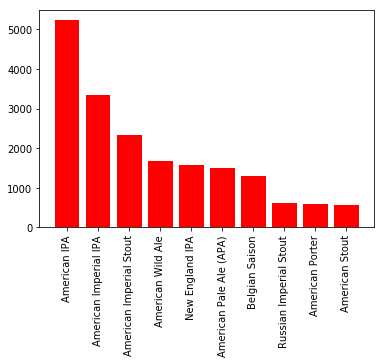

In [29]:
plt.bar(range(len(tc_10)), list(tc_10.values()), align='center', color='R')
plt.xticks(range(len(tc_10)), list(tc_10.keys()), rotation=90)
plt.show()

In [30]:
brew_counts = {}
for x in list(beer_matrix['brewery']):
    if not x in brew_counts:
        brew_counts[x] = 1
    else:
        brew_counts[x] += 1

In [31]:
brew_counts

{'Surly Brewing Company': 60,
 'Carlsberg Sverige AB': 2,
 'Pipeworks Brewing Company': 131,
 'LIC Beer Project': 22,
 'Kane Brewing Company': 84,
 'Crooked Stave Artisan Beer Project': 66,
 'MoMac Brewing': 2,
 'Cascade Lakes Brewing Co.': 5,
 'Sly Fox Brewing Company': 18,
 'Pressure Drop Brewing': 3,
 'Kinsmen Brewing Company': 6,
 'Grand River Brewing': 2,
 'Central Standard Brewing': 9,
 'Trillium Brewing Company': 223,
 'Lost Tavern Brewing': 19,
 'Maui Brewing Co.': 26,
 'Sierra Nevada Brewing Co.': 151,
 'Fort George Brewery + Public House': 17,
 'Two Brothers Brewing Company': 31,
 'Exile Brewing Co.': 19,
 'Rotunda Brewing Co.': 16,
 'Shirak Manufacturers': 3,
 "Fat Head's Brewery & Saloon": 38,
 '11 Below Brewing': 9,
 'Stone City Ales': 10,
 'Torrside Brewing': 1,
 'The Lost Abbey': 54,
 'Interboro Spirits and Ales': 45,
 'New Holland Brewing Company': 48,
 'The Veil Brewing Co.': 162,
 'Cloudburst Brewing': 14,
 'Hop Butcher For The World': 47,
 'Side Launch Brewing Compan

In [32]:
bc_10 = dict(Counter(brew_counts).most_common(10))
bc_10

{'Other Half Brewing Co.': 285,
 'Trillium Brewing Company': 223,
 'Hill Farmstead Brewery': 181,
 'Tired Hands Brewing Company': 166,
 'The Veil Brewing Co.': 162,
 'Tree House Brewing Company': 161,
 'Modern Times Beer': 160,
 'The Bruery': 152,
 'Sierra Nevada Brewing Co.': 151,
 'Stone Brewing': 135}

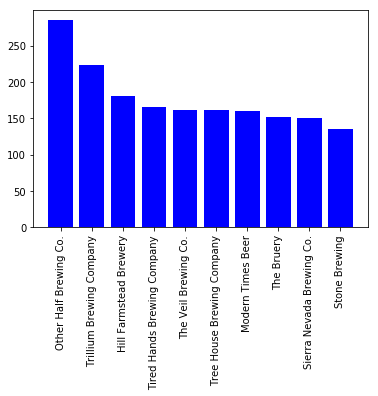

In [33]:
plt.bar(range(len(tc_10)), list(bc_10.values()), align='center', color="B")
plt.xticks(range(len(tc_10)), list(bc_10.keys()), rotation=90)
plt.show()

In [34]:
len(set(list(beer_matrix['abv'])))

378

In [35]:
abv_counts = {}
for x in list(beer_matrix['abv']):
    if not x in abv_counts:
        abv_counts[x] = 1
    else:
        abv_counts[x] += 1

In [36]:
sum(beer_matrix['abv'] == '12.00')

379

In [37]:
abv_counts['12.00']

379

In [38]:
ac_10 = dict(Counter(abv_counts).most_common(10))
ac_10

{'6.00': 1697,
 '7.00': 1637,
 '5.00': 1566,
 '8.00': 1530,
 '6.50': 1388,
 '5.50': 1256,
 '?': 982,
 '8.50': 896,
 '7.50': 838,
 '4.50': 767}

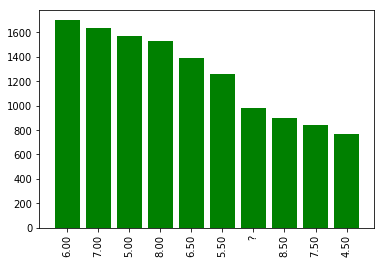

In [39]:
plt.bar(range(len(tc_10)), list(ac_10.values()), align='center', color='G')
plt.xticks(range(len(tc_10)), list(ac_10.keys()), rotation=90)
plt.show()

In [40]:
list(utility.columns)

['97 Feet',
 'Barrel Runner',
 'Blah Blah Blah IPA',
 'Bomb!',
 'Bride Male Order - Barrel Aged Russian Imperial Stout',
 'Caffè Americano',
 "Curmudgeon's Better Half",
 'DKML',
 'Dankwood',
 'Drew Curtis / Wil Wheaton / Greg Koch - Stone Farking Wheaton w00tstout',
 'El Lupulo Libre',
 'Elle',
 'Evil Twin / Lervig - Big Ass Money Stout 3',
 'Franz',
 "G'Suffa!",
 'Green Zebra Gose',
 'Hell Or High Watermelon Wheat Beer',
 'Insane Wanderer: Volume 1',
 'Insane Wanderer: Volume 2',
 'MadTree / Fat Heads - Lupulin Effect',
 'Mexorcist',
 'Old Zahm Oktoberfest',
 'Omission IPA (Gluten-Free)',
 'Panic Switch',
 'Peach Dodo',
 'Peanut Butter Chocolate Porter',
 'Pimp My Sleigh',
 'Pleasurable Demise',
 'Prima Pils',
 'Punk IPA',
 'Reforged XX',
 'Resin',
 'Sanwald Hefe Weizen',
 'See Foam',
 "Short's Huma Lupa Licious India Pale Ale",
 'Solid Gold',
 'Spirit Beast 2018',
 'Spooky Tooth Imperial Pumpkin',
 'Stickee Monkee',
 'Trappistes Rochefort 6',
 'Trappistes Rochefort 8',
 'Trigo',
 'U

In [41]:
utility_copy = utility.copy()
utility_copy['UID'] = list(range(1, len(utility)+1))

In [42]:
utility_copy_features = utility_copy.drop(columns=['UID', 'user_name'], axis=1)
utility_copy_features.index.name = 'BID'

In [43]:
utility_copy_features.head()

,97 Feet,Barrel Runner,Blah Blah Blah IPA,Bomb!,Bride Male Order - Barrel Aged Russian Imperial Stout,Caffè Americano,Curmudgeon's Better Half,DKML,Dankwood,Drew Curtis / Wil Wheaton / Greg Koch - Stone Farking Wheaton w00tstout,...,Refreshin' Session,Rods And Cones,Rosellini,Stinky Hippie,Tangerine Swirl,Coldspresso,Hop Sensei,Love Child No. 8,Obol Oat Wine Style Ale,Sunny Side Up - Little Amps! (Bourbon Barrel Aged)
BID,,,,,,,,,,,,,,,,,,,,,
0,4.18,4.08,4.08,4.43,4.33,4.44,4.59,3.94,4.02,4.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df = pd.DataFrame(utility_copy_features.values, columns=list(utility_copy_features.columns))

In [45]:
df['UID'] = list(range(1, len(df)+1))

In [46]:
df.head()

,97 Feet,Barrel Runner,Blah Blah Blah IPA,Bomb!,Bride Male Order - Barrel Aged Russian Imperial Stout,Caffè Americano,Curmudgeon's Better Half,DKML,Dankwood,Drew Curtis / Wil Wheaton / Greg Koch - Stone Farking Wheaton w00tstout,...,Rods And Cones,Rosellini,Stinky Hippie,Tangerine Swirl,Coldspresso,Hop Sensei,Love Child No. 8,Obol Oat Wine Style Ale,Sunny Side Up - Little Amps! (Bourbon Barrel Aged),UID
0,4.18,4.08,4.08,4.43,4.33,4.44,4.59,3.94,4.02,4.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [47]:
#rotate dataframe so that every individual rating is its own row
long_matrix1 = pd.melt(df, 
        id_vars='UID', 
        value_vars=utility_copy_features,
        var_name='beer_name',
        value_name='rating')

long_matrix1 = long_matrix1.dropna()
long_matrix1.head()

,UID,beer_name,rating
0,1,97 Feet,4.18
2682,1,Barrel Runner,4.08
2736,55,Barrel Runner,3.59
2778,97,Barrel Runner,3.82
2785,104,Barrel Runner,3.94


In [48]:
long_matrix2 = long_matrix1[long_matrix1.rating != 0]
long_matrix2.head()

,UID,beer_name,rating
0,1,97 Feet,4.18
2682,1,Barrel Runner,4.08
2736,55,Barrel Runner,3.59
2778,97,Barrel Runner,3.82
2785,104,Barrel Runner,3.94


In [49]:
# long_matrix2['rating'] = long_matrix2['rating'].astype('float64')

In [50]:
long_matrix2.head()

,UID,beer_name,rating
0,1,97 Feet,4.18
2682,1,Barrel Runner,4.08
2736,55,Barrel Runner,3.59
2778,97,Barrel Runner,3.82
2785,104,Barrel Runner,3.94


In [51]:
long_matrix2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86133 entries, 0 to 86532047
Data columns (total 3 columns):
UID          86133 non-null int64
beer_name    86133 non-null object
rating       86133 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ MB


In [52]:
long_matrix2.to_csv('long_matrix.txt', sep='\t')

In [53]:
long_matrix2.shape

(86133, 3)

In [54]:
count_list = {}
for x in list(long_matrix2['beer_name']):
    if not x in count_list:
        count_list[x] = 1
    else:
        count_list[x] += 1

In [55]:
count_list

{'97 Feet': 1,
 'Barrel Runner': 63,
 'Blah Blah Blah IPA': 7,
 'Bomb!': 74,
 'Bride Male Order - Barrel Aged Russian Imperial Stout': 1,
 'Caffè Americano': 16,
 "Curmudgeon's Better Half": 125,
 'DKML': 24,
 'Dankwood': 61,
 'Drew Curtis / Wil Wheaton / Greg Koch - Stone Farking Wheaton w00tstout': 44,
 'El Lupulo Libre': 3,
 'Elle': 3,
 'Evil Twin / Lervig - Big Ass Money Stout 3': 10,
 'Franz': 5,
 "G'Suffa!": 3,
 'Green Zebra Gose': 23,
 'Hell Or High Watermelon Wheat Beer': 12,
 'Insane Wanderer: Volume 1': 7,
 'Insane Wanderer: Volume 2': 7,
 'MadTree / Fat Heads - Lupulin Effect': 3,
 'Mexorcist': 1,
 'Old Zahm Oktoberfest': 1,
 'Omission IPA (Gluten-Free)': 4,
 'Panic Switch': 3,
 'Peach Dodo': 3,
 'Peanut Butter Chocolate Porter': 1,
 'Pimp My Sleigh': 6,
 'Pleasurable Demise': 1,
 'Prima Pils': 31,
 'Punk IPA': 23,
 'Reforged XX': 3,
 'Resin': 32,
 'Sanwald Hefe Weizen': 1,
 'See Foam': 7,
 "Short's Huma Lupa Licious India Pale Ale": 17,
 'Solid Gold': 39,
 'Spirit Beast 201

In [56]:
count_list

{'97 Feet': 1,
 'Barrel Runner': 63,
 'Blah Blah Blah IPA': 7,
 'Bomb!': 74,
 'Bride Male Order - Barrel Aged Russian Imperial Stout': 1,
 'Caffè Americano': 16,
 "Curmudgeon's Better Half": 125,
 'DKML': 24,
 'Dankwood': 61,
 'Drew Curtis / Wil Wheaton / Greg Koch - Stone Farking Wheaton w00tstout': 44,
 'El Lupulo Libre': 3,
 'Elle': 3,
 'Evil Twin / Lervig - Big Ass Money Stout 3': 10,
 'Franz': 5,
 "G'Suffa!": 3,
 'Green Zebra Gose': 23,
 'Hell Or High Watermelon Wheat Beer': 12,
 'Insane Wanderer: Volume 1': 7,
 'Insane Wanderer: Volume 2': 7,
 'MadTree / Fat Heads - Lupulin Effect': 3,
 'Mexorcist': 1,
 'Old Zahm Oktoberfest': 1,
 'Omission IPA (Gluten-Free)': 4,
 'Panic Switch': 3,
 'Peach Dodo': 3,
 'Peanut Butter Chocolate Porter': 1,
 'Pimp My Sleigh': 6,
 'Pleasurable Demise': 1,
 'Prima Pils': 31,
 'Punk IPA': 23,
 'Reforged XX': 3,
 'Resin': 32,
 'Sanwald Hefe Weizen': 1,
 'See Foam': 7,
 "Short's Huma Lupa Licious India Pale Ale": 17,
 'Solid Gold': 39,
 'Spirit Beast 201

In [57]:
# sum_list = []
# for beer in long_matrix2['beer_name']:
#     filtered = long_matrix2.loc[long_matrix2['beer_name'] == beer]
#     sum_list.append(filtered['rating'].mean())
    

In [58]:
# sum_list = {}
# for x in list(long_matrix2['beer_name']):
#     if not x in sum_list:
#         sum_list[x] = long_matrix2['rating']
#     else:
#         sum_list[x] += long_matrix2['rating']

In [59]:
# sum_list

In [60]:
utility.head()

,97 Feet,Barrel Runner,Blah Blah Blah IPA,Bomb!,Bride Male Order - Barrel Aged Russian Imperial Stout,Caffè Americano,Curmudgeon's Better Half,DKML,Dankwood,Drew Curtis / Wil Wheaton / Greg Koch - Stone Farking Wheaton w00tstout,...,Refreshin' Session,Rods And Cones,Rosellini,Stinky Hippie,Tangerine Swirl,Coldspresso,Hop Sensei,Love Child No. 8,Obol Oat Wine Style Ale,Sunny Side Up - Little Amps! (Bourbon Barrel Aged)
0,4.18,4.08,4.08,4.43,4.33,4.44,4.59,3.94,4.02,4.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
np.nanmean(utility['Barrel Runner'])

3.675079365079365

In [74]:
np.nanmean(utility['97 Feet'])

4.18

In [75]:
utility.mean()

97 Feet                                                                    4.180000
Barrel Runner                                                              3.675079
Blah Blah Blah IPA                                                         3.954286
Bomb!                                                                      4.460811
Bride Male Order - Barrel Aged Russian Imperial Stout                      4.330000
Caffè Americano                                                            4.341875
Curmudgeon's Better Half                                                   4.281760
DKML                                                                       3.859167
Dankwood                                                                   4.049344
Drew Curtis / Wil Wheaton / Greg Koch - Stone Farking Wheaton w00tstout    4.222500
El Lupulo Libre                                                            4.250000
Elle                                                                       4

In [76]:
utility_mean = utility.mean()

In [122]:
print(utility_mean.rename_axis('beer').reset_index(name='rating').to_dict('records'))

[{'beer': '97 Feet', 'rating': 4.18}, {'beer': 'Barrel Runner', 'rating': 3.675079365079365}, {'beer': 'Blah Blah Blah IPA', 'rating': 3.954285714285714}, {'beer': 'Bomb!', 'rating': 4.460810810810811}, {'beer': 'Bride Male Order - Barrel Aged Russian Imperial Stout', 'rating': 4.33}, {'beer': 'Caffè Americano', 'rating': 4.341875}, {'beer': "Curmudgeon's Better Half", 'rating': 4.28176}, {'beer': 'DKML', 'rating': 3.859166666666667}, {'beer': 'Dankwood', 'rating': 4.049344262295082}, {'beer': 'Drew Curtis / Wil Wheaton / Greg Koch - Stone Farking Wheaton w00tstout', 'rating': 4.2225}, {'beer': 'El Lupulo Libre', 'rating': 4.25}, {'beer': 'Elle', 'rating': 4.233333333333333}, {'beer': 'Evil Twin / Lervig - Big Ass Money Stout 3', 'rating': 4.1850000000000005}, {'beer': 'Franz', 'rating': 3.696}, {'beer': "G'Suffa!", 'rating': 3.48}, {'beer': 'Green Zebra Gose', 'rating': 4.003478260869565}, {'beer': 'Hell Or High Watermelon Wheat Beer', 'rating': 3.4458333333333333}, {'beer': 'Insane W

In [ ]:
#top ten types
list(tc_10)

In [ ]:
#top ten breweries
list(bc_10)

In [82]:
import matplotlib.pyplot as plt

In [83]:
breweries = ['Other Half Brewing Co.',
'Trillium Brewing Company',
'Hill Farmstead Brewery',
'Tired Hands Brewing Company',
'The Veil Brewing Co.',
'Tree House Brewing Company',
'Modern Times Beer',
'The Bruery',
'Sierra Nevada Brewing Co.',
'Stone Brewing']
beer_types = ['American IPA',
'American Imperial IPA',
'American Imperial Stout',
'American Wild Ale',
'New England IPA',
'American Pale Ale (APA)',
'Belgian Saison',
'Russian Imperial Stout',
'American Porter',
'American Stout']

In [86]:
all_stuff = []
for btype in beer_types:
    listy = []
    all_one_type = beer_matrix.loc[beer_matrix['b_type'] == btype]
    for brewery in breweries:
        num = len(all_one_type.loc[all_one_type['brewery'] == brewery])
        listy.append(num)
    all_stuff.append(listy)

t1=all_stuff[0]
t2=all_stuff[1]
t3=all_stuff[2]
t4=all_stuff[3]
t5=all_stuff[4]
t6=all_stuff[5]
t7=all_stuff[6]
t8=all_stuff[7]
t9=all_stuff[8]
t10=all_stuff[9]

In [97]:
type(breweries)

list

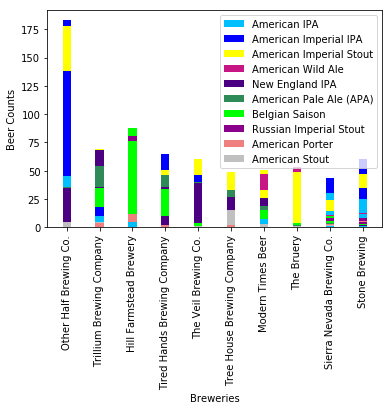

In [120]:
N = 10        #-- Number of trains
ind = np.arange(10)      # the x locations for the groups
width = 0.25            # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, t1, width, color='deepskyblue')
p2 = plt.bar(ind, t2, width, color='blue', bottom=t1)
p3 = plt.bar(ind, t3, width, color='yellow', bottom=t2)
p4 = plt.bar(ind, t4, width, color="mediumvioletred", bottom=t3)
p5 = plt.bar(ind, t5, width, color='indigo', bottom=t4)
p6 = plt.bar(ind, t6, width, color='seagreen', bottom=t5)
p7 = plt.bar(ind, t7, width, color='lime', bottom=t6)
p8 = plt.bar(ind, t8, width, color='darkmagenta', bottom=t7)
p9 = plt.bar(ind, t9, width, color='lightcoral', bottom=t8)
p10 = plt.bar(ind, t10, width, color='silver', bottom=t9)
plt.ylabel('Beer Counts')
plt.xlabel('Breweries')
plt.xticks(np.arange(10),('Other Half Brewing Co.',
'Trillium Brewing Company',
'Hill Farmstead Brewery',
'Tired Hands Brewing Company',
'The Veil Brewing Co.',
'Tree House Brewing Company',
'Modern Times Beer',
'The Bruery',
'Sierra Nevada Brewing Co.',
'Stone Brewing'), rotation=90)
# plt.figure(figsize=(20,10))
plt.legend(beer_types)